In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = [
    [0.1, 0.6],
    [0.15, 0.71],
    [0.08, 0.9],
    [0.16, 0.85],
    [0.2, 0.3],
    [0.25, 0.5],
    [0.24, 0.1],
    [0.3, 0.2]
]

data = pd.DataFrame(data, columns = ['x', 'y'])

centroids = [
    [0.1, 0.6],
    [0.3, 0.2]
]

k = 2

In [3]:
def calc_distance(x1, x2):
    return (sum((x1 - x2)**2))**0.5

In [4]:
def assign_clusters(centroids, data):
    clusters = []
    for i in range(data.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, data.iloc[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

In [7]:
def calc_centroids(clusters, data):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(data), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [8]:
clusters = assign_clusters(centroids, data)

In [9]:
centroids = calc_centroids(clusters, data)

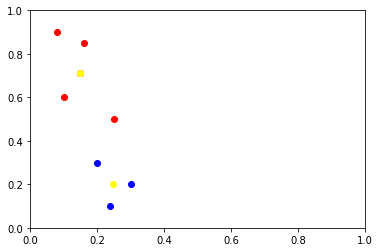

In [10]:
plt.plot()
colors = ['red', 'blue']

for i in range(data.shape[0]):
    plt.scatter(data.iloc[i]['x'], data.iloc[i]['y'], c = colors[clusters[i]])

for i in centroids:
    plt.scatter(i[0], i[1], c = 'yellow')

plt.axis([0, 1, 0, 1])
plt.show()

In [11]:
print(f'P6 belongs to cluster C{clusters[5]+1} coloured in {colors[clusters[5]]}')

P6 belongs to cluster C1 coloured in red


In [12]:
print(f'Population of cluster around P8 is {clusters.count(clusters[7])} (Cluster is shown in {colors[clusters[7]]} colour)')

Population of cluster around P8 is 3 (Cluster is shown in blue colour)


In [13]:
print(f'Updated values of centroids are ({centroids[0][0]}, {centroids[0][1]}) and ({centroids[1][0]}, {centroids[1][1]})')

Updated values of centroids are (0.148, 0.712) and (0.24666666666666667, 0.20000000000000004)
